In [ ]:
# Social liberalism x Education correlation weaker for ethnic minorities?

# https://twitter.com/JamesKanag/status/1522920088197816320

In [1]:
dataset_name = "W19_comb"
df_list = 'BES_Panel'
#            'BES_reduced_with_na'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [7]:
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )
pan_dataset_votes = pd.read_pickle(BES_small_data_files + "pan_dataset_votes"+".zip", compression='zip')

In [33]:
pan_dataset_ages

,Age_at_W1_rounded,Age_at_W1,Age_at_W2,Age_at_W3,Age_at_W4,Age_at_W5,Age_at_W6,Age_at_W7,Age_at_W8,Age_at_W9,...,standardAgeGroup_at_W1,equalisedAgeGroup_at_W1,equalisedAgeGroup_at_W1_detailed,equalLengthAgeGroup_at_W1,standardAgeGroup_at_W19,equalisedAgeGroup_at_W19,equalisedAgeGroup_at_W19_detailed,equalLengthAgeGroup_at_W19,rough_predictions,Age_at_W1_missing_values
0,58,57.850863,57.855603,58.335336,58.833221,58.909397,58.970528,59.900456,60.019697,60.106970,...,56-65,"(57.0, 65.0]","(57.0, 61.0]","(55, 60]",56-65,"(63.0, 71.0]","(63.0, 67.0]","(60, 65]",61.709015,57.872400
1,62,61.847247,61.851987,62.331720,62.829605,62.905781,62.966912,63.896840,64.016081,64.103355,...,56-65,"(57.0, 65.0]","(61.0, 65.0]","(60, 65]",66+,"(63.0, 71.0]","(67.0, 71.0]","(65, 70]",61.180430,61.868784
2,76,75.812681,75.817421,76.297154,76.795039,76.871215,76.932346,77.862274,77.981515,78.068788,...,66+,"(65.0, 100.0]","(69.0, 100.0]","(75, 80]",66+,"(71.0, 106.0]","(75.0, 106.0]","(80, 85]",71.241910,75.834218
3,51,50.984062,50.988802,51.468535,51.966419,52.042595,52.103727,53.033655,53.152896,53.240169,...,46-55,"(49.0, 57.0]","(49.0, 54.0]","(50, 55]",56-65,"(55.0, 63.0]","(55.0, 59.0]","(55, 60]",50.193882,51.005599
4,68,67.984062,67.988802,68.468535,68.966419,69.042595,69.103727,70.033655,70.152896,70.240169,...,66+,"(65.0, 100.0]","(65.0, 69.0]","(65, 70]",66+,"(71.0, 106.0]","(71.0, 75.0]","(70, 75]",67.017960,68.005599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97001,23,23.378732,23.383472,23.863205,24.361089,24.437265,24.498397,25.428324,25.547566,25.634839,...,18-25,"(22.0, 31.0]","(22.0, 27.0]","(20, 25]",26-35,"(28.0, 37.0]","(28.0, 33.0]","(25, 30]",28.690456,23.400269
97002,24,24.378732,24.383472,24.863205,25.361089,25.437265,25.498397,26.428324,26.547566,26.634839,...,18-25,"(22.0, 31.0]","(22.0, 27.0]","(20, 25]",26-35,"(28.0, 37.0]","(28.0, 33.0]","(30, 35]",15.019540,24.400269
97003,30,30.331278,30.336018,30.815751,31.313636,31.389812,31.450943,32.380871,32.500112,32.587385,...,26-35,"(22.0, 31.0]","(27.0, 31.0]","(25, 30]",36-45,"(28.0, 37.0]","(33.0, 37.0]","(35, 40]",33.571175,30.352815
97004,20,20.378732,20.383472,20.863205,21.361089,21.437265,21.498397,22.428324,22.547566,22.634839,...,18-25,"(11.0, 22.0]","(18.0, 22.0]","(15, 20]",26-35,"(17.0, 28.0]","(24.0, 28.0]","(25, 30]",30.570265,20.400269


In [ ]:
### so, just a quick thought if HE participation correlates differently - more weakly! - with social liberalism for ethnic minorities

In [8]:
pan_dataset_allr_values

,id,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Economic: Left <-> Right{gaussian-ish},Social: Liberalism <-> Conservatism{gaussian-ish},Economic: Left <-> Right{gaussian-ish}completish,Economic: Left <-> Right{gaussian-ish}complete,Social: Liberalism <-> Conservatism{gaussian-ish}completish,Social: Liberalism <-> Conservatism{gaussian-ish}complete,Economic: Left <-> Right{gaussian-ish}complete_fully,Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully
0,1,6.0,183.0,-1.913311,1.379564,-1.913311,-1.913311,1.379564,1.379564,-1.913311,1.379564
1,2,195.0,54.0,1.929016,-0.648342,1.929016,1.929016,-0.648342,-0.648342,1.929016,-0.648342
2,3,74.0,116.0,-0.313073,0.242132,-0.313073,-0.313073,0.242132,0.242132,-0.313073,0.242132
3,4,149.0,132.0,0.643054,0.470176,0.643054,0.643054,0.470176,0.470176,0.643054,0.470176
4,5,169.0,99.0,1.004469,0.012041,1.004469,1.004469,0.012041,0.012041,1.004469,0.012041
...,...,...,...,...,...,...,...,...,...,...,...
97001,98447,118.0,57.0,0.217387,-0.585382,0.217387,0.217387,-0.585382,-0.585382,0.217387,-0.585382
97002,98448,159.0,23.0,0.791833,-1.276719,0.791833,0.791833,-1.276719,-1.276719,0.791833,-1.276719
97003,98449,42.0,49.0,-0.789732,-0.721598,-0.789732,-0.789732,-0.721598,-0.721598,-0.789732,-0.721598
97004,98450,94.0,149.0,-0.056723,0.706377,-0.056723,-0.056723,0.706377,0.706377,-0.056723,0.706377


In [6]:
BES_Panel#.loc[pan_dataset_allr_values.index]

,wave1,wave2,wave3,wave4,wave5,wave6,wave7,wave8,wave9,wave10,...,oslauaW10,oslauaW11,oslauaW12,oslauaW13,oslauaW14,oslauaW15,oslauaW17,oslauaW18,oslauaW19,oslauaW16
id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Tandridge,Tandridge,Tandridge,Tandridge,Tandridge,NaN,Tandridge,Tandridge,Tandridge,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,Boston,Boston,Boston,Boston,Boston,Boston,NaN,NaN,Boston,Boston
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Preston,NaN,NaN,NaN
98448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Plymouth,NaN,NaN,NaN
98449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Adur,NaN,Adur,NaN


In [9]:
search(BES_Panel,"edlevel")

p_edlevelW1        25576
p_edlevelW2        25419
p_edlevelW3        23735
p_edlevelW4        26686
p_edlevelW5        26129
p_edlevelW6        25541
p_edlevelW7        26256
p_edlevelW8        28334
p_edlevelW9        25425
p_edlevelW10       25808
p_edlevelW11       26328
p_edlevelW12       29170
p_edlevelW13       26577
p_edlevelW14       26296
p_edlevelW15       26109
p_edlevelW16       31861
p_edlevelW17       29092
p_edlevelW18       31920
p_edlevelW19       27317
p_edlevelUniW7     28593
p_edlevelUniW9     27956
p_edlevelUniW10    28127
p_edlevelUniW11    28826
p_edlevelUniW12    32001
p_edlevelUniW13    29078
p_edlevelUniW14    28812
p_edlevelUniW15    28520
p_edlevelUniW16    34927
p_edlevelUniW19    29841
p_edlevelUniW8     29016
p_edlevelUniW17    31098
p_edlevelUniW18    23047
dtype: int64

In [10]:
p_edlevel = amalgamate_waves(BES_Panel,"p_edlevelW\d+")

Amalgamating variables: 
{1: 'p_edlevelW1', 2: 'p_edlevelW2', 3: 'p_edlevelW3', 4: 'p_edlevelW4', 5: 'p_edlevelW5', 6: 'p_edlevelW6', 7: 'p_edlevelW7', 8: 'p_edlevelW8', 9: 'p_edlevelW9', 10: 'p_edlevelW10', 11: 'p_edlevelW11', 12: 'p_edlevelW12', 13: 'p_edlevelW13', 14: 'p_edlevelW14', 15: 'p_edlevelW15', 16: 'p_edlevelW16', 17: 'p_edlevelW17', 18: 'p_edlevelW18', 19: 'p_edlevelW19'} ['p_edlevelW1', 'p_edlevelW2', 'p_edlevelW3', 'p_edlevelW4', 'p_edlevelW5', 'p_edlevelW6', 'p_edlevelW7', 'p_edlevelW8', 'p_edlevelW9', 'p_edlevelW10', 'p_edlevelW11', 'p_edlevelW12', 'p_edlevelW13', 'p_edlevelW14', 'p_edlevelW15', 'p_edlevelW16', 'p_edlevelW17', 'p_edlevelW18', 'p_edlevelW19']


In [14]:
p_edlevel.value_counts(dropna=False)

Undergraduate        29707
A-level              19979
GCSE                 17752
NaN                  10188
Postgrad              9356
No qualifications     6225
Below GCSE            3799
Name: p_edlevelW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19, dtype: int64

In [16]:
p_ethnicity = amalgamate_waves(BES_Panel,"p_ethnicity")

Amalgamating variables: 
{1: 'p_ethnicityW1', 2: 'p_ethnicityW2', 3: 'p_ethnicityW3', 4: 'p_ethnicityW4', 5: 'p_ethnicityW5', 6: 'p_ethnicityW6', 7: 'p_ethnicityW7', 8: 'p_ethnicityW8', 9: 'p_ethnicityW9', 10: 'p_ethnicityW10', 11: 'p_ethnicityW11', 12: 'p_ethnicityW12', 13: 'p_ethnicityW13', 14: 'p_ethnicityW14', 15: 'p_ethnicityW15', 16: 'p_ethnicityW16', 17: 'p_ethnicityW17', 18: 'p_ethnicityW18', 19: 'p_ethnicityW19'} ['p_ethnicityW1', 'p_ethnicityW2', 'p_ethnicityW3', 'p_ethnicityW4', 'p_ethnicityW5', 'p_ethnicityW6', 'p_ethnicityW7', 'p_ethnicityW8', 'p_ethnicityW9', 'p_ethnicityW10', 'p_ethnicityW11', 'p_ethnicityW12', 'p_ethnicityW13', 'p_ethnicityW14', 'p_ethnicityW15', 'p_ethnicityW16', 'p_ethnicityW17', 'p_ethnicityW18', 'p_ethnicityW19']


In [17]:
p_ethnicity.value_counts(dropna=False)

White British                 84560
Any other white background     4197
NaN                            1545
Indian                         1013
Prefer not to say               965
Black African                   566
Pakistani                       550
Any other mixed background      531
Other ethnic group              516
White and Asian                 494
Chinese                         465
Black Caribbean                 430
White and Black Caribbean       328
Any other Asian background      319
Bangladeshi                     245
White and Black African         171
Any other black background      111
Name: p_ethnicityW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19, dtype: int64

In [20]:
p_edlevel_num = p_edlevel.cat.codes.replace(-1,np.nan)

In [21]:
df = pan_dataset_allr_values.copy()
df["p_edlevel"] = p_edlevel_num
df["p_ethnicity"] = p_ethnicity

In [24]:
# df.columns

lr_col = "Economic: Left(0) <-> Right(200){uniform}"
al_col = "Social: Liberalism(0) <-> Conservatism(200){uniform}"

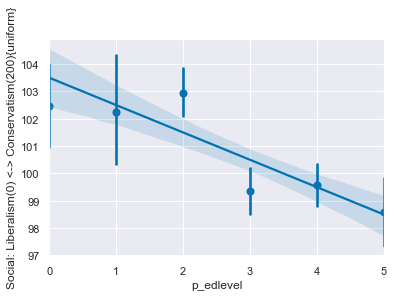

In [26]:
sns.regplot(data=df[df["p_ethnicity"]=="White British"],y=al_col,x="p_edlevel",x_estimator=np.mean)

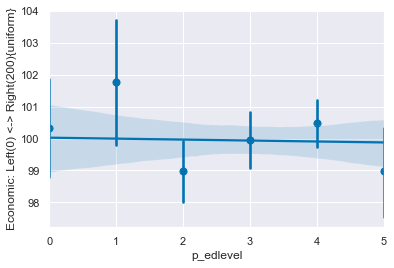

In [29]:
sns.regplot(data=df[df["p_ethnicity"]=="White British"],y=lr_col,x="p_edlevel",x_estimator=np.mean)

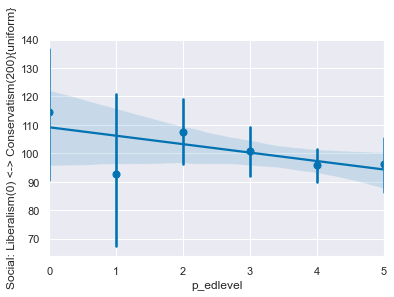

In [27]:
sns.regplot(data=df[df["p_ethnicity"]=="Indian"],y=al_col,x="p_edlevel",x_estimator=np.mean)

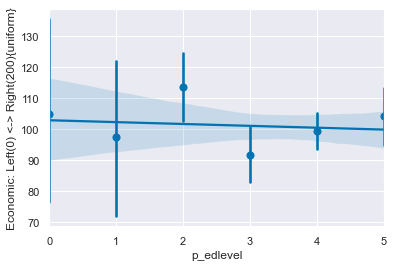

In [30]:
sns.regplot(data=df[df["p_ethnicity"]=="Indian"],y=lr_col,x="p_edlevel",x_estimator=np.mean)

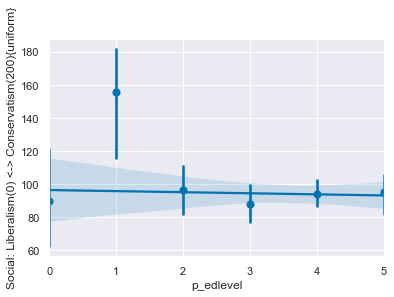

In [28]:
sns.regplot(data=df[df["p_ethnicity"]=="Black African"],y=al_col,x="p_edlevel",x_estimator=np.mean)

In [31]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [46]:
crime_data.data

,violent,murder,hs_grad,poverty,single,white,urban
state,,,,,,,
Alabama,459.9,7.1,82.1,17.5,29.0,70.0,48.65
Alaska,632.6,3.2,91.4,9.0,25.5,68.3,44.46
Arizona,423.2,5.5,84.2,16.5,25.7,80.0,80.07
Arkansas,530.3,6.3,82.4,18.8,26.3,78.4,39.54
California,473.4,5.4,80.6,14.2,27.8,62.7,89.73
Colorado,340.9,3.2,89.3,12.9,21.4,84.6,76.86
Connecticut,300.5,3.0,88.6,9.4,25.0,79.1,84.83
Delaware,645.1,4.6,87.4,10.8,27.6,71.9,68.71
District of Columbia,1348.9,24.2,87.1,18.4,48.0,38.7,100.00


eval_env: 1


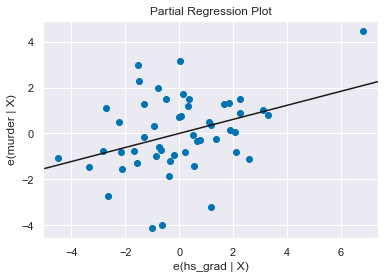

In [32]:
crime_data = sm.datasets.statecrime.load_pandas()
sm.graphics.plot_partregress(endog='murder', exog_i='hs_grad',
                              exog_others=['urban', 'poverty', 'single'],
                              data=crime_data.data, obs_labels=False)
plt.show()

In [41]:
df.dtypes

id                                                                    int64
Economic: Left(0) <-> Right(200){uniform}                           float64
Social: Liberalism(0) <-> Conservatism(200){uniform}                float64
Economic: Left <-> Right{gaussian-ish}                              float64
Social: Liberalism <-> Conservatism{gaussian-ish}                   float64
Economic: Left <-> Right{gaussian-ish}completish                    float64
Economic: Left <-> Right{gaussian-ish}complete                      float64
Social: Liberalism <-> Conservatism{gaussian-ish}completish         float64
Social: Liberalism <-> Conservatism{gaussian-ish}complete           float64
Economic: Left <-> Right{gaussian-ish}complete_fully                float64
Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully     float64
p_edlevel                                                           float64
p_ethnicity                                                        category
age         

In [44]:
df["lib_auth"] = df[al_col]

In [37]:
df["age"] = pan_dataset_ages["Age_at_W19"].values

eval_env: 1


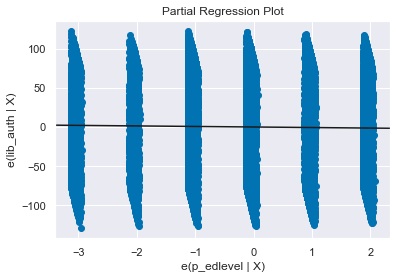

In [50]:
mask = df[["lib_auth","p_edlevel","age"]].notnull().all(axis=1)

sm.graphics.plot_partregress(endog="lib_auth", exog_i="p_edlevel",
                              exog_others=['age'],
                              data=df[mask], obs_labels=False)
plt.show()

eval_env: 1


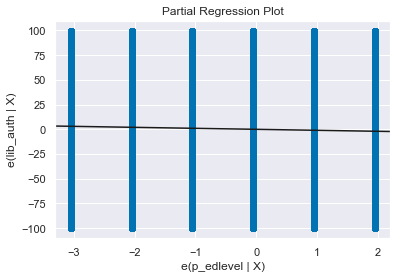

In [53]:
mask = df[["lib_auth","p_edlevel","age"]].notnull().all(axis=1)

sm.graphics.plot_partregress(endog="lib_auth", exog_i="p_edlevel",
                              exog_others=[],
                              data=df[mask], obs_labels=False)
plt.show()

eval_env: 1


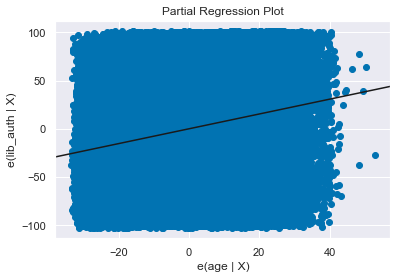

In [51]:
mask = df[["lib_auth","p_edlevel","age"]].notnull().all(axis=1)

sm.graphics.plot_partregress(endog="lib_auth", exog_i="age",
                              exog_others=["p_edlevel"],
                              data=df[mask], obs_labels=False)
plt.show()

eval_env: 1


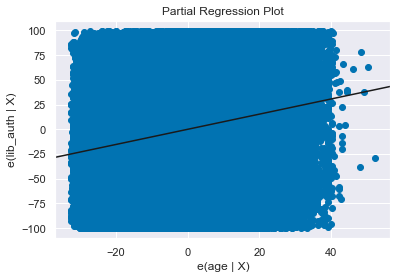

In [52]:
mask = df[["lib_auth","p_edlevel","age"]].notnull().all(axis=1)

sm.graphics.plot_partregress(endog="lib_auth", exog_i="age",
                              exog_others=[],
                              data=df[mask], obs_labels=False)
plt.show()

In [ ]:
### are young people w/o ed 50:50 Con/Lab

In [ ]:
## p_edlevel -> edlevel
## age/ageGroup
## vote choice

# weight

7554

In [63]:
pan_dataset_votes["2019GEVote_complete"]

id
1        UNK
2        CON
3        BXP
4        UNK
5        UNK
        ... 
98447    UNK
98448    UNK
98449    DNV
98450    UNK
98451    UNK
Name: 2019GEVote_complete, Length: 97006, dtype: category
Categories (14, object): ['BXP', 'CON', 'DK', 'GP', ..., 'TYTV(Def)', 'TYTV(Maybe)', 'Not Present', 'UNK']

In [75]:
pan_dataset_votes["2019GEVote_complete"][mask].groupby(p_edlevel[mask]).value_counts()

p_edlevelW1&2&3&4&5&6&7&8&9&10&11&12&13&14&15&16&17&18&19  2019GEVote_complete
No qualifications                                          UNK                      79
                                                           DNV                       5
                                                           LAB                       2
                                                           CON                       1
                                                           GP                        1
Below GCSE                                                 UNK                      65
                                                           DNV                       5
                                                           LAB                       4
GCSE                                                       UNK                     504
                                                           LAB                      32
                                                   

In [182]:
pan_dataset_ages["standardAgeGroup_at_W19"].value_counts()

66+      23627
56-65    16962
36-45    15988
26-35    15931
46-55    15548
18-25     8950
Name: standardAgeGroup_at_W19, dtype: int64

In [95]:
p_edlevel.name="p_edlevel"

In [193]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["standardAgeGroup_at_W19"]
mask = ageGroupW19== "18-25"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())
vote = pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"])
vote.name = "2019GEVote 18-25"
(round(pd.crosstab(degree_binary[mask],
                  vote,
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

1610


2019GEVote 18-25,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
Degree,,,,,,,,,,
No,1,17,1,3,37,10,1,1,3,26
Yes,0,14,0,3,46,13,1,0,3,19


In [192]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["standardAgeGroup_at_W19"]
mask = ageGroupW19== "26-35"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())
vote = pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"])
vote.name = "2019GEVote 26-35"


(round(pd.crosstab(degree_binary[mask],
                  vote,
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

3003


2019GEVote 26-35,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
Degree,,,,,,,,,,
No,2,18,1,1,23,5,0,0,3,46
Yes,0,18,1,3,45,12,1,0,3,18


In [195]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["standardAgeGroup_at_W19"]
mask = ageGroupW19== "36-45"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())
vote = pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"])
vote.name = "2019GEVote 36-45"


(round(pd.crosstab(degree_binary[mask],
                  vote,
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

4251


2019GEVote 36-45,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
Degree,,,,,,,,,,
No,2,28,1,2,25,5,1,0,2,33
Yes,1,25,1,3,33,14,1,0,3,18


In [197]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["standardAgeGroup_at_W19"]
mask = ageGroupW19== "46-55"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())
vote = pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"])
vote.name = "2019GEVote 46-55"


(round(pd.crosstab(degree_binary[mask],
                  vote,
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

5637


2019GEVote 46-55,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
Degree,,,,,,,,,,
No,2,39,2,2,19,6,1,0,4,25
Yes,1,31,1,3,31,14,1,1,3,13


In [187]:
BES_Panel["p_edlevelUniW19"][mask].value_counts()

Undergraduate        1358
Postgrad              527
A-level               514
GCSE                  290
No qualifications      73
Below GCSE             37
Name: p_edlevelUniW19, dtype: int64

In [97]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["equalLengthAgeGroup_at_W19"]
mask = ageGroupW19== "(15, 20]"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())


(round(pd.crosstab(p_edlevel[mask],
                  pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"]),
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

252


2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
p_edlevel,,,,,,,,,,
No qualifications,0,53,0,0,3,0,0,0,0,44
Below GCSE,0,0,0,0,0,0,0,0,0,0
GCSE,0,15,0,0,22,1,1,2,3,56
A-level,1,17,1,4,41,11,1,0,1,24
Undergraduate,0,32,0,0,42,0,0,0,4,22
Postgrad,0,0,0,0,54,0,0,0,10,36


In [179]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["equalLengthAgeGroup_at_W19"]
mask = ageGroupW19== "(20, 25]"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())


(round(pd.crosstab(p_edlevel[mask],
                  pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"]),
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

1253


2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
p_edlevel,,,,,,,,,,
No qualifications,0,15,0,3,24,0,0,0,0,57
Below GCSE,0,0,0,0,25,0,0,0,0,75
GCSE,3,15,5,2,36,2,0,0,2,34
A-level,0,19,1,3,40,12,0,1,5,20
Undergraduate,1,14,1,3,47,12,1,0,3,19
Postgrad,0,10,0,4,47,14,1,1,1,22


In [178]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["equalLengthAgeGroup_at_W19"]
mask = ageGroupW19== "(25, 30]"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())


(round(pd.crosstab(p_edlevel[mask],
                  pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"]),
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

1366


2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
p_edlevel,,,,,,,,,,
No qualifications,3,15,4,0,11,5,0,5,0,57
Below GCSE,8,24,0,0,7,5,0,0,7,49
GCSE,0,11,3,1,19,3,0,0,4,59
A-level,1,20,0,1,30,6,1,0,2,39
Undergraduate,0,18,1,3,42,12,1,0,2,21
Postgrad,0,10,1,3,55,12,0,0,3,16


In [99]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["equalLengthAgeGroup_at_W19"]
mask = ageGroupW19== "(35, 40]"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())


(round(pd.crosstab(p_edlevel[mask],
                  pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"]),
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)

2068


2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
p_edlevel,,,,,,,,,,
No qualifications,1,18,2,0,22,8,0,0,3,47
Below GCSE,1,23,0,0,25,7,2,2,1,39
GCSE,1,24,2,1,23,5,1,0,2,42
A-level,1,31,0,2,26,6,1,0,3,28
Undergraduate,1,25,1,3,37,12,1,0,3,17
Postgrad,0,14,1,3,44,18,1,0,3,17


id
1                  NaN
2        Undergraduate
3              A-level
4                  NaN
5                  NaN
             ...      
98447              NaN
98448              NaN
98449             GCSE
98450              NaN
98451              NaN
Name: p_edlevelW19, Length: 97006, dtype: category
Categories (6, object): ['No qualifications' < 'Below GCSE' < 'GCSE' < 'A-level' < 'Undergraduate' < 'Postgrad']

In [177]:
pan_dataset_ages.index = pan_dataset_votes.index
ageGroupW19 = pan_dataset_ages["equalLengthAgeGroup_at_W19"]
mask = ageGroupW19== "(35, 40]"
mask = mask&BES_Panel["wt_new_W19_result"].notnull()
print(mask.sum())
votes_2019 = 

ct = (round(pd.crosstab(BES_Panel["p_edlevelUniW19"][mask],
                  pan_dataset_votes["2019GEVote_complete"][mask].cat.remove_categories(["TYTV(Def)","TYTV(Maybe)","Not Present","UNK"]),
                  values=BES_Panel["wt_new_W19_result"][mask],aggfunc=sum,normalize='index'),2)*100).astype(int)
ct

2068


2019GEVote_complete,BXP,CON,DK,GP,LAB,LD,OTH,PC,SNP,DNV
p_edlevelUniW19,,,,,,,,,,
No qualifications,2,19,2,0,23,7,0,0,1,46
Below GCSE,1,23,0,0,26,7,2,2,0,39
GCSE,1,25,1,1,23,5,1,0,2,40
A-level,1,32,0,2,26,7,1,0,3,28
Undergraduate,1,25,1,3,36,12,1,0,3,18
Postgrad,0,13,1,3,44,17,1,0,3,17


In [188]:
degree_binary = BES_Panel["p_edlevelUniW19"].replace({'No qualifications':"No", 'Below GCSE':"No", 'GCSE':"No", 'A-level':"No", 'Undergraduate':"Yes",       'Postgrad':"Yes"})

degree_binary.value_counts(dropna=False)
degree_binary.name = "Degree"

In [ ]:
## plot with age against Con vs Lab

In [166]:
Con_vs_Lab = (pan_dataset_votes["2019GEVote_complete"] == "CON").astype(float)



mask = degree_binary.notnull() & pan_dataset_votes["2019GEVote_complete"].isin(["CON","LAB"]) & BES_Panel["wt_new_W19_result"].notnull()
mask = mask & (pan_dataset_ages["Age_at_W19"][mask]>20) & (pan_dataset_ages["Age_at_W19"][mask]<80)

In [169]:
df = pd.concat([pan_dataset_ages["Age_at_W19"][mask].round().astype(int),Con_vs_Lab[mask],degree_binary[mask]],axis=1)
df["Age_at_W19"] = round(df["Age_at_W19"]/2)*2

df["2019GEVote_complete"] = list(zip(df["2019GEVote_complete"],BES_Panel["wt_new_W19_result"][mask]))

In [148]:
sns.lmplot()

In [198]:
Con_vs_Lab = (pan_dataset_votes["2019GEVote_complete"] == "CON").astype(float)

mask = degree_binary.notnull() & pan_dataset_votes["2019GEVote_complete"].isin(["CON","LAB"]) & BES_Panel["wt_new_W19_result"].notnull()

df = pd.concat([pan_dataset_ages["Age_at_W19"][mask].round().astype(int),Con_vs_Lab[mask],degree_binary[mask]],axis=1)

,Age_at_W19,2019GEVote_complete,Degree
id,,,
2,68.0,"(1.0, 0.4711800146793187)",Yes
6,54.0,"(0.0, 0.4683549563810423)",No
15,72.0,"(1.0, 0.6095896105246394)",Yes
23,60.0,"(1.0, 0.4233459949966377)",No
33,64.0,"(0.0, 0.41771335855153024)",Yes
...,...,...,...
98433,46.0,"(1.0, 1.8260309745833652)",No
98434,34.0,"(1.0, 1.0099107371114258)",No
98435,32.0,"(0.0, 1.1825171578999043)",Yes


In [231]:
bloc_votes = pan_dataset_votes["2019GEVote_complete"].replace({"CON":"Auth-Right","BXP":"Auth-Right",
                                                  "SNP":"Lib-Left","PC":"Lib-Left","GP":"Lib-Left","LD":"Lib-Left","LAB":"Lib-Left",
                                                  "DNV":"Non-voting",
                                                "UNK":np.nan,"DK":np.nan,"OTH":np.nan,"Not Present":np.nan,
                                                  "TYTV(Maybe)":np.nan,"TYTV(Def)":np.nan})

# Con_vs_Lab = (pan_dataset_votes["2019GEVote_complete"] == "CON").astype(float)
degree_binary = BES_Panel["p_edlevelUniW19"].replace({'No qualifications':"No", 'Below GCSE':"No", 'GCSE':"No", 'A-level':"No", 'Undergraduate':"Yes",       'Postgrad':"Yes"})

# degree_binary.value_counts(dropna=False)
degree_binary.name = "Degree"


mask = degree_binary.notnull() & bloc_votes.notnull() & BES_Panel["wt_new_W19_result"].notnull()
# mask = mask & (pan_dataset_ages["Age_at_W19"][mask]>20) & (pan_dataset_ages["Age_at_W19"][mask]<80)

df = pd.concat([pan_dataset_ages["Age_at_W19"][mask],pd.get_dummies(bloc_votes)[mask],degree_binary[mask],BES_Panel["wt_new_W19_result"][mask]],axis=1)

In [232]:
df

,Age_at_W19,Auth-Right,Lib-Left,Non-voting,Degree,wt_new_W19_result
id,,,,,,
2,67.541886,1,0,0,Yes,0.471180
3,81.507320,1,0,0,No,0.346831
6,54.449359,0,1,0,No,0.468355
7,62.500360,0,1,0,No,0.532937
14,81.421125,1,0,0,No,0.656503
...,...,...,...,...,...,...
98435,32.025917,0,1,0,Yes,1.182517
98437,49.025917,1,0,0,No,1.872448
98440,44.025917,0,0,1,Yes,2.950034


In [233]:
df = df.melt(id_vars = ["Age_at_W19","Degree","wt_new_W19_result"])
df.columns = ['Age_at_W19', 'Degree','wt_new_W19_result', 'bloc', 'prob vote']
df

,Age_at_W19,Degree,wt_new_W19_result,bloc,prob vote
0,67.541886,Yes,0.471180,Auth-Right,1
1,81.507320,No,0.346831,Auth-Right,1
2,54.449359,No,0.468355,Auth-Right,0
3,62.500360,No,0.532937,Auth-Right,0
4,81.421125,No,0.656503,Auth-Right,1
...,...,...,...,...,...
85993,32.025917,Yes,1.182517,Non-voting,0
85994,49.025917,No,1.872448,Non-voting,0
85995,44.025917,Yes,2.950034,Non-voting,1
85996,36.025917,No,1.446198,Non-voting,0


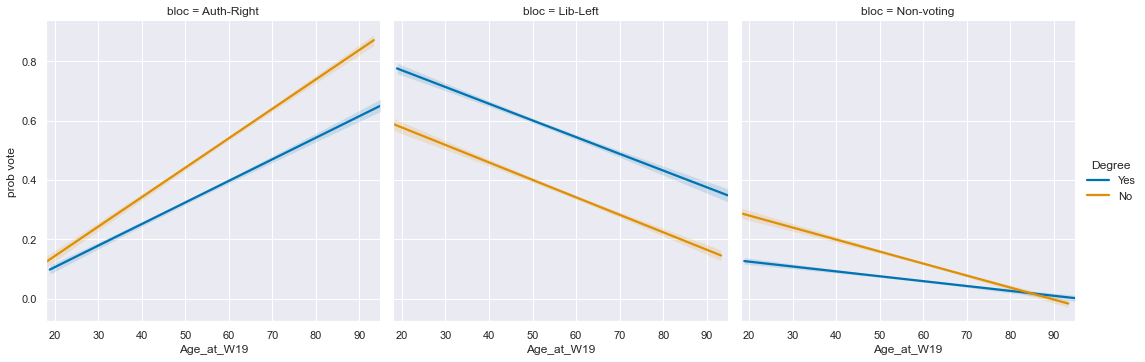

In [221]:
g = sns.lmplot(x="Age_at_W19", y="prob vote", col="bloc", hue="Degree", data=df, scatter=False)

Text(0.5, 1.0, '2019GE Vote Probability for Party Blocs/Non-Voting x Education')

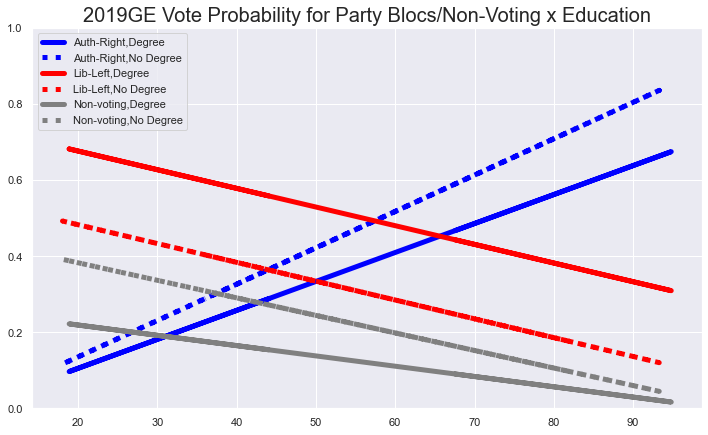

In [272]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

def plot_reg(X,y,sample_weight,color,label,lw=3,ls='--'):
    regr = LinearRegression()
    regr.fit(X, y, sample_weight)
    plt.plot(X, regr.predict(X), color=color, linewidth=lw, label=label, linestyle=ls)

plt.figure(figsize=(12,7))
    
bloc = "Auth-Right"
degree = "Yes"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='blue',label='Auth-Right,Degree',lw=5,ls="solid")

bloc = "Auth-Right"
degree = "No"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='blue',label='Auth-Right,No Degree',lw=5,ls="dotted")

bloc = "Lib-Left"
degree = "Yes"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='red',label=bloc+',Degree',lw=5,ls="solid")

bloc = "Lib-Left"
degree = "No"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='red',label=bloc+',No Degree',lw=5,ls="dotted")

bloc = "Non-voting"
degree = "Yes"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='grey',label=bloc+',Degree',lw=5,ls="solid")

bloc = "Non-voting"
degree = "No"
mask = (df["bloc"]==bloc) & (df["Degree"]==degree)
plot_reg(df[["Age_at_W19"]][mask],
         df["prob vote"][mask],
         df["wt_new_W19_result"][mask],color='grey',label=bloc+',No Degree',lw=5,ls="dotted")

plt.legend();
plt.ylim([0,1]);
plt.title("2019GE Vote Probability for Party Blocs/Non-Voting x Education",fontsize=20)

In [237]:
'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

,Age_at_W19
0,67.541886
1,81.507320
2,54.449359
3,62.500360
4,81.421125
...,...
28661,32.025917
28662,49.025917
28663,44.025917
28664,36.025917


In [207]:
bloc_votes.value_counts(dropna=False)

NaN           66221
Lib-Left      14144
Auth-Right    13417
Non-voting     3224
Name: 2019GEVote_complete, dtype: int64

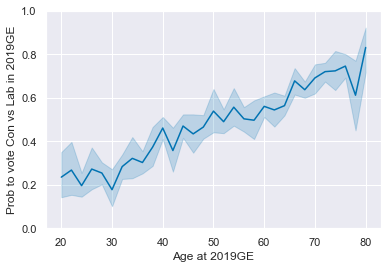

In [172]:
sns.lineplot(data=df[df["Degree"]=="Yes"],
    x="Age_at_W19", y="2019GEVote_complete", estimator = weighted_mean
)
plt.ylabel("Prob to vote Con vs Lab in 2019GE");
plt.xlabel("Age at 2019GE");
plt.ylim([0,1]);

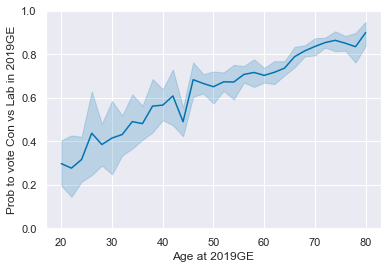

In [173]:
sns.lineplot(data=df[df["Degree"]=="No"],
    x="Age_at_W19", y="2019GEVote_complete", estimator = weighted_mean
)
plt.ylabel("Prob to vote Con vs Lab in 2019GE");
plt.xlabel("Age at 2019GE");
plt.ylim([0,1]);

<function utility.weighted_mean(x, **kws)>

In [131]:
Con_vs_Lab[mask]

id
2        1.0
6        0.0
14       1.0
15       1.0
23       1.0
        ... 
98433    1.0
98434    1.0
98435    0.0
98437    1.0
98445    1.0
Name: 2019GEVote_complete, Length: 17874, dtype: float64

In [125]:
Con_vs_Lab[mask]

id
2         True
6        False
14        True
15        True
23        True
         ...  
98433     True
98434     True
98435    False
98437     True
98445     True
Name: 2019GEVote_complete, Length: 17874, dtype: bool

In [108]:
BES_Panel["p_edlevelW19"].value_counts()

Undergraduate        9471
GCSE                 6079
A-level              5339
Postgrad             3155
No qualifications    2041
Below GCSE           1232
Name: p_edlevelW19, dtype: int64

In [109]:
BES_Panel["p_edlevelUniW19"].value_counts()

Undergraduate        11522
GCSE                  6079
A-level               5812
Postgrad              3155
No qualifications     2041
Below GCSE            1232
Name: p_edlevelUniW19, dtype: int64

In [107]:
BES_Panel["p_edlevelW19"].cat.categories

Index(['No qualifications', 'Below GCSE', 'GCSE', 'A-level', 'Undergraduate',
       'Postgrad'],
      dtype='object')

In [102]:
search(BES_Panel,"p_edlevel")

p_edlevelW1        25576
p_edlevelW2        25419
p_edlevelW3        23735
p_edlevelW4        26686
p_edlevelW5        26129
p_edlevelW6        25541
p_edlevelW7        26256
p_edlevelW8        28334
p_edlevelW9        25425
p_edlevelW10       25808
p_edlevelW11       26328
p_edlevelW12       29170
p_edlevelW13       26577
p_edlevelW14       26296
p_edlevelW15       26109
p_edlevelW16       31861
p_edlevelW17       29092
p_edlevelW18       31920
p_edlevelW19       27317
p_edlevelUniW7     28593
p_edlevelUniW9     27956
p_edlevelUniW10    28127
p_edlevelUniW11    28826
p_edlevelUniW12    32001
p_edlevelUniW13    29078
p_edlevelUniW14    28812
p_edlevelUniW15    28520
p_edlevelUniW16    34927
p_edlevelUniW19    29841
p_edlevelUniW8     29016
p_edlevelUniW17    31098
p_edlevelUniW18    23047
dtype: int64

In [91]:
mask.sum()

1253

In [77]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

In [66]:
mask

0        False
1        False
2        False
3        False
4        False
         ...  
97001    False
97002    False
97003    False
97004    False
97005    False
Name: equalLengthAgeGroup_at_W19, Length: 97006, dtype: bool